# Seafood (HOTDOG OR NOT A HOTDOG)


In [7]:
import numpy as np
from PIL import Image
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

# Image preprocessing for feeding into model
Using PIL image library
1.Image to array conversion
2.Array image reshaping in 64pixels shape(64*64*3)
3.Stacking the image

In [8]:
def get_image(file_name):
    im=Image.open(file_name)
    return im.resize((64,64),Image.ANTIALIAS)
def get_image_folder_list(folder_name):
    return [f for f in listdir(folder_name) if isfile(join(folder_name,f))]
def gettin_array(folder):
    image_list=get_image_folder_list(folder)
    m=[]   
    for i in image_list:
        k=np.array(get_image(folder+i))
     
        m.append(k[np.newaxis:,])
    return m                      

In [9]:
train_hotdog = np.array(gettin_array("/home/pranav/Downloads/train/hot_dog/"))
train_nothotdog = np.array(gettin_array("/home/pranav/Downloads/train/not_hot_dog/"))
Trainreal=np.concatenate((train_hotdog,train_nothotdog),axis=0)
Trainreal_ = Trainreal/255
print (Trainreal.shape)
Y_hotdog = np.ones((train_hotdog.shape[0],1))
Y_nothotdog = np.zeros((train_nothotdog.shape[0],1))

Yrealtrain = np.concatenate((Y_hotdog,Y_nothotdog),axis = 0)
print (Yrealtrain.shape)
Xtesthot_dog = np.array(gettin_array("/home/pranav/Downloads/test/hot_dog/"))
Xtestnothot_dog = np.array(gettin_array("/home/pranav/Downloads/test/not_hot_dog/"))
Testreal=np.concatenate((Xtesthot_dog,Xtestnothot_dog),axis=0)
print (Testreal.shape)
Y_hotdogtest = np.ones((Xtesthot_dog.shape[0],1))
Y_nothotdogtest = np.zeros((Xtestnothot_dog.shape[0],1))
Yrealtest = np.concatenate((Y_hotdogtest,Y_nothotdogtest),axis = 0)



(929, 64, 64, 3)
(929, 1)
(69, 64, 64, 3)


# CNN model in Keras
One Relu activation for one CNN layer and sigmoid activation for final layer 
3 steps involved in keras implementation 
1.Create the model
2.Compile the model by calling model.compile() function 
3.Run the model using model.fit() function

In [21]:
def Model_seafood(shape_train):
    X_input = Input(shape_train)
    X = ZeroPadding2D((3, 3))(X_input)
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X =  Dropout(.6, noise_shape=None, seed=None)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
    model = Model(inputs = X_input, outputs = X, name='Model_seafood')
    return model

In [22]:
seafoodModel = Model_seafood(Trainreal_[1].shape)

In [23]:
seafoodModel.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])


In [33]:
seafoodModel.fit(x=Trainreal_,y=Yrealtrain,epochs = 10,batch_size = 32 )


Epoch 1/10
929/929 [==============================] - 7s 8ms/step - loss: 0.0656 - acc: 0.9871
Epoch 2/10
929/929 [==============================] - 7s 8ms/step - loss: 0.0567 - acc: 0.9871
Epoch 3/10
929/929 [==============================] - 7s 8ms/step - loss: 0.0516 - acc: 0.9935
Epoch 4/10
929/929 [==============================] - 7s 8ms/step - loss: 0.0490 - acc: 0.9957
Epoch 5/10
929/929 [==============================] - 7s 8ms/step - loss: 0.0540 - acc: 0.9892
Epoch 6/10
929/929 [==============================] - 7s 8ms/step - loss: 0.0503 - acc: 0.9871
Epoch 7/10
929/929 [==============================] - 7s 8ms/step - loss: 0.0475 - acc: 0.9914
Epoch 8/10
929/929 [==============================] - 7s 8ms/step - loss: 0.0449 - acc: 0.9935
Epoch 9/10
929/929 [==============================] - 7s 8ms/step - loss: 0.0517 - acc: 0.9892
Epoch 10/10
929/929 [==============================] - 7s 8ms/step - loss: 0.0383 - acc: 0.9957


In [35]:
seafoodModel.evaluate(x=Testreal,y=Yrealtest, batch_size=32, verbose=1)

69/69 [==============================] - 0s 4ms/step


[4.410304449606633, 0.7246376820232557]

(1, 64, 64, 3)
this is hot_dog


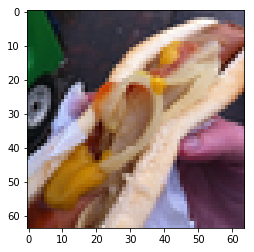

In [18]:
any_im = Trainreal[np.random.randint(len(Trainreal))]
plt.imshow(any_im)
any_im = np.expand_dims(any_im, axis=0)
print (any_im.shape)
valpred = seafoodModel.predict(x=any_im)
if valpred==1:
    print ("this is hot_dog")
elif valpred==0:
    print ("this is not hot_dog")